In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


In [279]:
customer = pd.read_csv('kunden.csv', delimiter= ';')
table_customer = pd.DataFrame(customer)

visitor = pd.read_csv('besucher.csv', delimiter= ';', decimal= ',')
table_visitor = pd.DataFrame(visitor)

geodata = pd.read_csv('geo.txt', delimiter= '\t')
table_geo = pd.DataFrame(geodata)

print(table_customer)
print(table_visitor)
print(table_geo)

      Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
0        64    66894.0   88160.31         1.0  43.0   K0310
1        54    77644.0  103145.70         1.0  40.0   K1042
2        55    44341.0   80565.16         0.0  37.0   K0382
3        49    67271.0   83949.89         0.0  42.0   K0498
4        46    49832.0   93781.58         0.0  41.0   K0552
...     ...        ...        ...         ...   ...     ...
1099     70    69581.0  103751.58         1.0  51.0   K0467
1100     38    48301.0   64230.98         1.0  33.0   K0122
1101     67    63547.0  103123.57         1.0  41.0   K1045
1102     37    32686.0   49215.87         1.0  36.0   K1096
1103     55    71240.0  106132.59         1.0  49.0   K0861

[1104 rows x 6 columns]
     Alter     Einkommen  Geschlecht  Zeit KundeNr
0       30  39919.095335           0  29.0   K1814
1       41  53430.673086           0  27.0   K1544
2       64  73163.216927           0  32.0   K1945
3       41  36761.482581           0  44.0   K1825


In [280]:
sorted_customer = table_customer.sort_values('KundeNr')
sorted_visitor = table_visitor.sort_values('KundeNr')
sorted_geo = table_geo.sort_values('KundeNr')

# Filtern der Zeilen von 'K1005' bis 'K1104'
customer_filtered = sorted_customer[(sorted_customer['KundeNr'] >= 'K1005') & (sorted_customer['KundeNr'] <= 'K1104')]
visitor_filtered = sorted_visitor[(sorted_visitor['KundeNr'] >= 'K1005') & (sorted_visitor['KundeNr'] <= 'K1104')]
geo_filtered = sorted_geo[(sorted_geo['KundeNr'] >= 'K1005') & (sorted_geo['KundeNr'] <= 'K1104')]

# Anzeigen der gefilterten DataFrames
print("Gefilterte Zeilen von table_customer (K1005 bis K1104):")
print(customer_filtered)

print("\nGefilterte Zeilen von table_visitor (K1005 bis K1104):")
print(visitor_filtered)

print("\nGefilterte Zeilen von table_geo (K1005 bis K1104):")
print(geo_filtered)

Gefilterte Zeilen von table_customer (K1005 bis K1104):
     Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr
816     69    84021.0  133358.19         1.0  56.0   K1005
579     47    46708.0   70719.18         1.0  31.0   K1006
221     54    57917.0   94386.02         1.0  47.0   K1007
950     62    57795.0   85730.62         0.0  38.0   K1008
967     69    77887.0  126098.91         0.0  51.0   K1009
..     ...        ...        ...         ...   ...     ...
240     61    82624.0  134755.80         1.0  59.0   K1100
422     39    37905.0   61717.86         1.0  32.0   K1101
758     39    40159.0   67170.69         1.0  37.0   K1102
813     48    45545.0   75700.83         0.0  30.0   K1103
829     63    80414.0  101554.64         1.0  49.0   K1104

[100 rows x 6 columns]

Gefilterte Zeilen von table_visitor (K1005 bis K1104):
Empty DataFrame
Columns: [Alter, Einkommen, Geschlecht, Zeit, KundeNr]
Index: []

Gefilterte Zeilen von table_geo (K1005 bis K1104):
     KundeNr        Nie

In [281]:
 ## überschneiden sich die KundeNr

In [282]:
sum_rows = (1104+891)

print(sum_rows)

1995


In [283]:
table_customer_resorted = table_customer[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Preis', 'Zeit']]
table_customer_sort_by_KNr = table_customer_resorted.sort_values('KundeNr')

table_visitor_resorted = table_visitor[['KundeNr', 'Geschlecht', 'Alter', 'Einkommen', 'Zeit']]
table_visitor_sort_by_KNr = table_visitor_resorted.sort_values('KundeNr')

print(table_customer_sort_by_KNr)
print(table_visitor_sort_by_KNr)

    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit
476   K0001         1.0     68    89437.0  114481.90  62.0
892   K0002         1.0     58    65271.0  106258.99  44.0
225   K0003         1.0     44    48195.0   85705.57  29.0
174   K0004         0.0     37    48957.0   76412.36  36.0
991   K0005         0.0     50    56621.0   92898.67  40.0
..      ...         ...    ...        ...        ...   ...
240   K1100         1.0     61    82624.0  134755.80  59.0
422   K1101         1.0     39    37905.0   61717.86  32.0
758   K1102         1.0     39    40159.0   67170.69  37.0
813   K1103         0.0     48    45545.0   75700.83  30.0
829   K1104         1.0     63    80414.0  101554.64  49.0

[1104 rows x 6 columns]
    KundeNr  Geschlecht  Alter     Einkommen  Zeit
454   K1105           0     42  57149.498007  35.0
812   K1106           1     34  43358.564350  33.0
229   K1107           1     33  45748.426936  55.0
400   K1108           1     57  58633.969764  32.0
744   K1109 

In [284]:
customer_merge = pd.merge(table_customer_sort_by_KNr, table_geo, on = 'KundeNr', how = 'outer')
customer_geo = customer_merge.head(1104)
visitor_merge = pd.merge(table_visitor_sort_by_KNr, table_geo, on='KundeNr', how='outer')
visitor_geo = visitor_merge.head(891)

print("outer join:\n", customer_geo)
print("outer Join:\n", visitor_geo)

outer join:
      KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
0      K0001         1.0   68.0    89437.0  114481.90  62.0        Sachsen
1      K0002         1.0   58.0    65271.0  106258.99  44.0            NRW
2      K0003         1.0   44.0    48195.0   85705.57  29.0         Hessen
3      K0004         0.0   37.0    48957.0   76412.36  36.0         Bayern
4      K0005         0.0   50.0    56621.0   92898.67  40.0         Bayern
...      ...         ...    ...        ...        ...   ...            ...
1099   K1100         1.0   61.0    82624.0  134755.80  59.0         Berlin
1100   K1101         1.0   39.0    37905.0   61717.86  32.0         Hessen
1101   K1102         1.0   39.0    40159.0   67170.69  37.0  Niedersachsen
1102   K1103         0.0   48.0    45545.0   75700.83  30.0         Berlin
1103   K1104         1.0   63.0    80414.0  101554.64  49.0        Sachsen

[1104 rows x 7 columns]
outer Join:
     KundeNr  Geschlecht  Alter     Einkommen  Zei

In [285]:
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(customer_isna_rows)

print(
    )
visitor_isna_rows = visitor_geo[visitor_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(visitor_isna_rows)

Zeilen mit mindestens einem NaN-Wert:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
23    K0024         NaN   41.0    46542.0   63477.00  40.0   
89    K0090         NaN   64.0    83452.0  133180.70  62.0   
165   K0166         NaN   53.0    49798.0   61329.51  39.0   
324   K0325         NaN   52.0    66602.0   98756.07  45.0   
789   K0790         NaN   67.0    91461.0  131748.07  66.0   

           Niederlassung  
23     Baden-Württemberg  
89         Niedersachsen  
165  Nordrhein-Westfalen  
324               Bayern  
789               Berlin  

Zeilen mit mindestens einem NaN-Wert:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Zeit, Niederlassung]
Index: []


In [286]:
counts = customer_geo['Geschlecht'].value_counts(normalize=True)
percentage_1 = counts.get(1.0, 0)
percentage_0 = counts.get(0.0, 0)

print(f"Prozentualer Anteil von 1.0: {percentage_1:.2%}")
print(f"Prozentualer Anteil von 0.0: {percentage_0:.2%}")

Prozentualer Anteil von 1.0: 63.79%
Prozentualer Anteil von 0.0: 36.21%


In [287]:
nan_indices = customer_geo[customer_geo['Geschlecht'].isnull()].index
replacement_values = np.random.choice([1.0, 0.0], size=len(nan_indices), p=[percentage_1, percentage_0])
customer_geo.loc[nan_indices, 'Geschlecht'] = replacement_values
customer_geo_noNaN = customer_geo.rename(columns={'Geschlecht': 'customer_geo_noNaN'})

customer_geo_noNaN = customer_geo
visitor_geo_noNaN = visitor_geo

print(customer_geo_noNaN)
print(visitor_geo_noNaN)

     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
0      K0001         1.0   68.0    89437.0  114481.90  62.0        Sachsen
1      K0002         1.0   58.0    65271.0  106258.99  44.0            NRW
2      K0003         1.0   44.0    48195.0   85705.57  29.0         Hessen
3      K0004         0.0   37.0    48957.0   76412.36  36.0         Bayern
4      K0005         0.0   50.0    56621.0   92898.67  40.0         Bayern
...      ...         ...    ...        ...        ...   ...            ...
1099   K1100         1.0   61.0    82624.0  134755.80  59.0         Berlin
1100   K1101         1.0   39.0    37905.0   61717.86  32.0         Hessen
1101   K1102         1.0   39.0    40159.0   67170.69  37.0  Niedersachsen
1102   K1103         0.0   48.0    45545.0   75700.83  30.0         Berlin
1103   K1104         1.0   63.0    80414.0  101554.64  49.0        Sachsen

[1104 rows x 7 columns]
    KundeNr  Geschlecht  Alter     Einkommen  Zeit          Niederlassung
0

In [288]:
customer_isna_rows = customer_geo[customer_geo.isna().any(axis = 1)]
print("Zeilen mit mindestens einem NaN-Wert:")
print(customer_isna_rows)

Zeilen mit mindestens einem NaN-Wert:
Empty DataFrame
Columns: [KundeNr, Geschlecht, Alter, Einkommen, Preis, Zeit, Niederlassung]
Index: []


In [289]:
print(customer_geo.dtypes)

print(
    )

print(visitor_geo.dtypes)

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Preis            float64
Zeit             float64
Niederlassung     object
dtype: object

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Zeit             float64
Niederlassung     object
dtype: object


In [290]:
print("Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in customer_geo ganzzahlig?")
print(
    )
columns_are_int_a = ['Geschlecht', 'Alter', 'Zeit']

for col in columns_are_int_a:
    customer_geo_is_int = customer_geo_noNaN[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if customer_geo_is_int:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")
print(
    )
print("Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in visitor_geo ganzzahlig?")
print(
    )
columns_are_int_b = ['Geschlecht', 'Alter', 'Zeit']

for col in columns_are_int_b:
    visitor_geo_is_int = visitor_geo_noNaN[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if visitor_geo_is_int:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")

Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in customer_geo ganzzahlig?

Alle Werte in der Spalte 'Geschlecht' sind ganze Zahlen.
Alle Werte in der Spalte 'Alter' sind ganze Zahlen.
Alle Werte in der Spalte 'Zeit' sind ganze Zahlen.

Sind alle Werte für 'Geschlecht', 'Alter' und 'Zeit' in visitor_geo ganzzahlig?

Alle Werte in der Spalte 'Geschlecht' sind ganze Zahlen.
Alle Werte in der Spalte 'Alter' sind ganze Zahlen.
Alle Werte in der Spalte 'Zeit' sind ganze Zahlen.


In [291]:
print("Also convertieren wir diese Spalten in integer")
print(
    )
customer_geo_retype = customer_geo.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(customer_geo_retype)
print(
    )
print(customer_geo_retype.dtypes)
print(
    )
visitor_geo_retype = visitor_geo.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})
print(visitor_geo_retype)
print(
    )
print(visitor_geo_retype.dtypes)

Also convertieren wir diese Spalten in integer

     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
0      K0001           1     68    89437.0  114481.90    62        Sachsen
1      K0002           1     58    65271.0  106258.99    44            NRW
2      K0003           1     44    48195.0   85705.57    29         Hessen
3      K0004           0     37    48957.0   76412.36    36         Bayern
4      K0005           0     50    56621.0   92898.67    40         Bayern
...      ...         ...    ...        ...        ...   ...            ...
1099   K1100           1     61    82624.0  134755.80    59         Berlin
1100   K1101           1     39    37905.0   61717.86    32         Hessen
1101   K1102           1     39    40159.0   67170.69    37  Niedersachsen
1102   K1103           0     48    45545.0   75700.83    30         Berlin
1103   K1104           1     63    80414.0  101554.64    49        Sachsen

[1104 rows x 7 columns]

KundeNr           object
G

In [292]:
print("Sind alle Werte für 'Einkommen' und 'Preis' in customer_geo ganzzahlig?")
print(
    )
columns_are_int_c = ['Einkommen', 'Preis']

for col in columns_are_int_c:
    customer_geo_is_int_c = customer_geo[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if customer_geo_is_int_c:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")
print(
    )

print("Sind alle Werte für 'Einkommen' in visitor_geo ganzzahlig?")
print(
    )
columns_are_int_d = ['Einkommen']

for col in columns_are_int_d:
    visitor_geo_is_int_d = visitor_geo[col].apply(lambda x: np.equal(x, np.round(x))).all()
    
    if visitor_geo_is_int_d:
        print(f"Alle Werte in der Spalte '{col}' sind ganze Zahlen.")
    else:
        print(f"Nicht alle Werte in der Spalte '{col}' sind ganze Zahlen.")

Sind alle Werte für 'Einkommen' und 'Preis' in customer_geo ganzzahlig?

Nicht alle Werte in der Spalte 'Einkommen' sind ganze Zahlen.
Nicht alle Werte in der Spalte 'Preis' sind ganze Zahlen.

Sind alle Werte für 'Einkommen' in visitor_geo ganzzahlig?

Nicht alle Werte in der Spalte 'Einkommen' sind ganze Zahlen.


In [293]:
print("Welchen Datentyp haben 'Einkommen' und 'Preis'?")
print(
    )
print(customer_geo_retype.dtypes)

Welchen Datentyp haben 'Einkommen' und 'Preis'?

KundeNr           object
Geschlecht         int32
Alter              int32
Einkommen        float64
Preis            float64
Zeit               int32
Niederlassung     object
dtype: object


In [294]:
print("Da Einkommen und Preis Geldwerte sind convertieren wir diese als float mit zwei Decimalstellen.")
print(
    )
customer_geo_retype['Einkommen'] = pd.to_numeric(customer_geo_retype['Einkommen'], errors='coerce')
customer_geo_retype['Preis'] = pd.to_numeric(customer_geo_retype['Preis'], errors='coerce')

customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].astype(float)
customer_geo_retype['Preis'] = customer_geo_retype['Preis'].astype(float)

customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].round(2)
customer_geo_retype['Preis'] = customer_geo_retype['Preis'].round(2)

print("Customer")
print(customer_geo_retype)
print(
    )
print(customer_geo_retype.dtypes)
print(
    )
visitor_geo_retype['Einkommen'] = pd.to_numeric(visitor_geo_retype['Einkommen'], errors='coerce')

visitor_geo_retype['Einkommen'] = visitor_geo_retype['Einkommen'].astype(float)

visitor_geo_retype['Einkommen'] = visitor_geo_retype['Einkommen'].round(2)

print("Visitor")
print(visitor_geo_retype)
print(
    )
print(visitor_geo_retype.dtypes)

Da Einkommen und Preis Geldwerte sind convertieren wir diese als float mit zwei Decimalstellen.

Customer
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
0      K0001           1     68    89437.0  114481.90    62        Sachsen
1      K0002           1     58    65271.0  106258.99    44            NRW
2      K0003           1     44    48195.0   85705.57    29         Hessen
3      K0004           0     37    48957.0   76412.36    36         Bayern
4      K0005           0     50    56621.0   92898.67    40         Bayern
...      ...         ...    ...        ...        ...   ...            ...
1099   K1100           1     61    82624.0  134755.80    59         Berlin
1100   K1101           1     39    37905.0   61717.86    32         Hessen
1101   K1102           1     39    40159.0   67170.69    37  Niedersachsen
1102   K1103           0     48    45545.0   75700.83    30         Berlin
1103   K1104           1     63    80414.0  101554.64    49        Sa

In [295]:
print("Treten unter den Values für 'Niederlassung Doppelungen auf?")
print(
    )
Niederlassung_unique_values_customer = customer_geo_retype['Niederlassung'].unique()
print(Niederlassung_unique_values_customer)
print(
    )
Niederlassung_unique_values_visitor = visitor_geo_retype['Niederlassung'].unique()
print(Niederlassung_unique_values_visitor)
print(
    )
print("Ja."" Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.")

Treten unter den Values für 'Niederlassung Doppelungen auf?

['Sachsen' 'NRW' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Nordrhein-Westfalen' 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen'
 'Hamburg' 'Düsseldorf' 'Berlin-Charlottenburg' 'Berlin-Mitte' 'BERLIN']

['Hessen' 'Berlin' 'Niedersachsen' 'Thüringen' 'Nordrhein-Westfalen'
 'Baden-Württemberg' 'Bayern' 'Hamburg' 'Sachsen' 'Brandenburg' 'BERLIN'
 'Düsseldorf' 'NRW' 'Berlin-Charlottenburg']

Ja. Wir fassen NRW; Nordrhein-westfalen unter Nordrhein-westfalen und BERLIN; Berlin-Charlottenburg; Berlin-Mitte; Berlin unter Berlin zusammen.


In [296]:
customer_geo_retype['Niederlassung'] = customer_geo_retype['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})

visitor_geo_retype['Niederlassung'] = visitor_geo_retype['Niederlassung'].replace({
    'NRW': 'Nordrhein-Westfalen',
    'BERLIN': 'Berlin',
    'Berlin-Charlottenburg': 'Berlin',
    'Berlin-Mitte': 'Berlin'
})
print("Customer")
print(customer_geo_retype)
print(
    )
print("Visitor")
print(visitor_geo_retype)

Customer
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
0      K0001           1     68    89437.0  114481.90    62   
1      K0002           1     58    65271.0  106258.99    44   
2      K0003           1     44    48195.0   85705.57    29   
3      K0004           0     37    48957.0   76412.36    36   
4      K0005           0     50    56621.0   92898.67    40   
...      ...         ...    ...        ...        ...   ...   
1099   K1100           1     61    82624.0  134755.80    59   
1100   K1101           1     39    37905.0   61717.86    32   
1101   K1102           1     39    40159.0   67170.69    37   
1102   K1103           0     48    45545.0   75700.83    30   
1103   K1104           1     63    80414.0  101554.64    49   

            Niederlassung  
0                 Sachsen  
1     Nordrhein-Westfalen  
2                  Hessen  
3                  Bayern  
4                  Bayern  
...                   ...  
1099               Berlin  
1100      

In [297]:
print("Sind nun noch Doppelungen vorhanden?")
  
filtered_df_customer = customer_geo_retype[customer_geo_retype['Niederlassung'].isin(['Nordrhein-Westfalen', 'Berlin'])]
remaining_unwanted_values_customer = customer_geo_retype[customer_geo_retype['Niederlassung'].isin(['NRW', 'BERLIN', 'Berlin-Charlottenburg', 'Berlin-Mitte'])]

if not remaining_unwanted_values_customer.empty:
    print("\nUngewollte Werte gefunden:")
    print(remaining_unwanted_values_customer)
else:
    print("\nKeine ungewollten Werte gefunden.")

filtered_df_visitor = visitor_geo_retype[visitor_geo_retype['Niederlassung'].isin(['Nordrhein-Westfalen', 'Berlin'])]
remaining_unwanted_values_visitor = visitor_geo_retype[visitor_geo_retype['Niederlassung'].isin(['NRW', 'BERLIN', 'Berlin-Charlottenburg', 'Berlin-Mitte'])]

if not remaining_unwanted_values_visitor.empty:
    print("\nUngewollte Werte gefunden:")
    print(remaining_unwanted_values_visitor)
else:
    print("\nKeine ungewollten Werte gefunden.")

Sind nun noch Doppelungen vorhanden?

Keine ungewollten Werte gefunden.

Keine ungewollten Werte gefunden.


In [298]:
print(visitor_geo.dtypes)

KundeNr           object
Geschlecht       float64
Alter            float64
Einkommen        float64
Zeit             float64
Niederlassung     object
dtype: object


In [299]:
# Visuelle & Statistische Ausreißerbereinigung von Customer

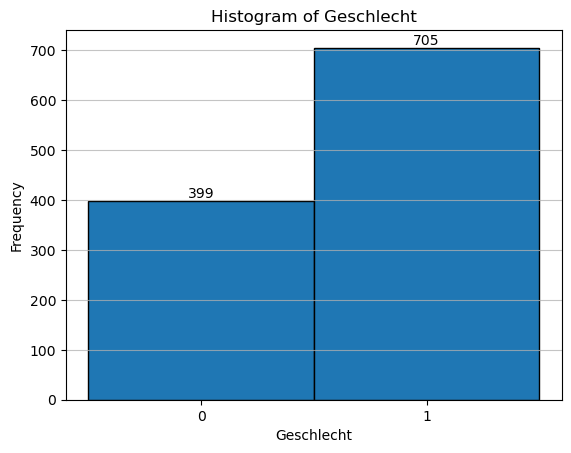

In [300]:
plt.hist(customer_geo_retype['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')  # Bins für 0 und 1 festlegen
plt.xticks([0, 1], ['0', '1'])  # Beschriftungen der x-Achse festlegen
plt.xlabel('Geschlecht')
plt.ylabel('Frequency')
plt.title('Histogram of Geschlecht')
for i in range(2):  # 0 und 1
    count = customer_geo_retype['Geschlecht'].value_counts()[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.show()

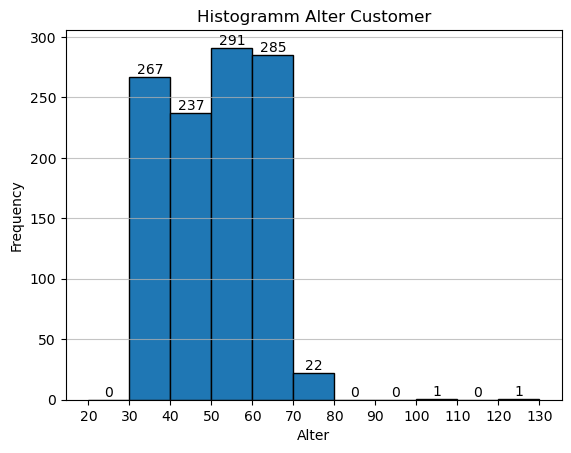

Untergrenze für Ausreißer: 8.5
Obergrenze für Ausreißer: 92.5
Ausreißer:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit      Niederlassung
38    K0039           1    120    61857.0  104214.07    52  Baden-Württemberg
493   K0494           0    100    88749.0  119134.23    64             Bayern
Eine Untergrenze von 8.5 macht keinen Sinn, da in Deutschland erst ab 18 Jahren Auto gefahren werden darf.
Eine Obergrenze von 92.5 macht aus unserer Sicht Sinn, da eine so alte Person bestimmt nicht mehr Auto fahren würden, aber in Einzelfällen ein Auto für eine andere Person Kaufen könnte.
In unserem Fall macht dieses Vorgehen die beiden einzigen über 80 liegenden Altersangaben zu Ausreißern.

Da wir eine moderat linksschiefe und extrem Rechtssteile verteilung vorliegen haben, ersetzen wir beide Werte mit dem Median


In [301]:
n, bins, patches = plt.hist(customer_geo_retype['Alter'], bins=range(20, 140, 10), edgecolor='black')  # Bins von 15 bis 135 in 10er-Schritten festlegen
plt.xticks(range(20, 140, 10))  # 10er-Schritte auf der x-Achse festlegen
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Customer')

# Anzahl der Werte über jedem Balken anzeigen
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)  # Gitterlinien hinzufügen
plt.show()

q1 = customer_geo_retype['Alter'].quantile(0.25)
q3 = customer_geo_retype['Alter'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifizieren von Ausreißern
outliers = customer_geo_retype[(customer_geo_retype['Alter'] < lower_bound) | (customer_geo_retype['Alter'] > upper_bound)]

print("Untergrenze für Ausreißer:", lower_bound)
print("Obergrenze für Ausreißer:", upper_bound)
print("Ausreißer:")
print(outliers)
print("Eine Untergrenze von 8.5 macht keinen Sinn, da in Deutschland erst ab 18 Jahren Auto gefahren werden darf.")
print("Eine Obergrenze von 92.5 macht aus unserer Sicht Sinn, da eine so alte Person bestimmt nicht mehr Auto fahren würden, aber in Einzelfällen ein Auto für eine andere Person Kaufen könnte.")
print("In unserem Fall macht dieses Vorgehen die beiden einzigen über 80 liegenden Altersangaben zu Ausreißern.")
print(
)
print("Da wir eine moderat linksschiefe und extrem Rechtssteile verteilung vorliegen haben, ersetzen wir beide Werte mit dem Median")    


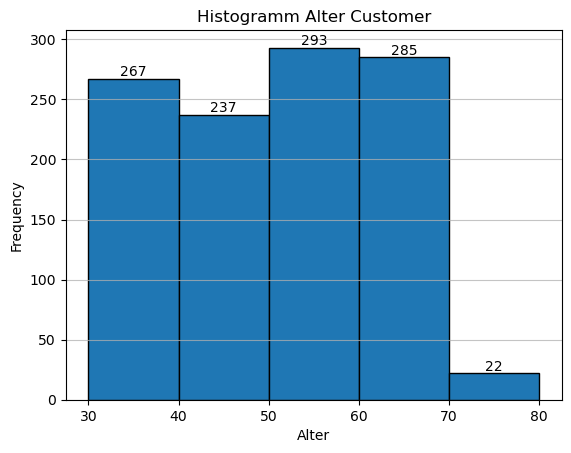

In [302]:
median = customer_geo_retype['Alter'].median()

# Berechnung des Interquartilsabstands (IQR) für die Spalte 'Alter'
q1 = customer_geo_retype['Alter'].quantile(0.25)
q3 = customer_geo_retype['Alter'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

customer_geo_retype['Alter'] = customer_geo_retype['Alter'].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

n, bins, patches = plt.hist(customer_geo_retype['Alter'], bins=range(30, 90, 10), edgecolor='black')  
plt.xticks(range(30, 90, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Customer')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

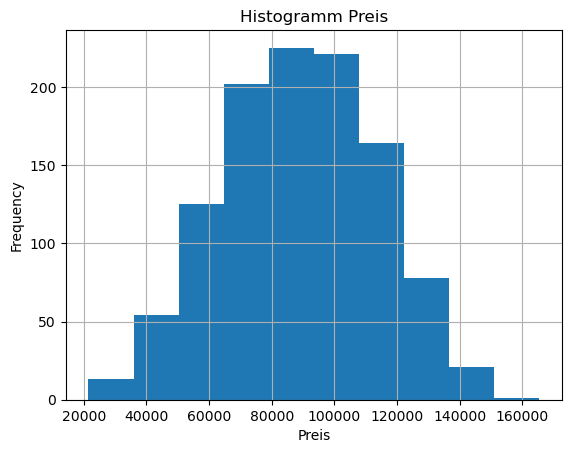

Untergrenze: 15883.493750000001
Obergrenze: 161819.30375
Ausreißer:
    KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  Niederlassung
414   K0415           1   68.0   107689.0  165482.31    60  Niedersachsen


In [303]:
customer_geo_retype['Preis'].hist()
plt.xlabel('Preis')
plt.ylabel('Frequency')
plt.title('Histogramm Preis')
plt.show()

q1 = customer_geo_retype['Preis'].quantile(0.25)
q3 = customer_geo_retype['Preis'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

# Identifizierung der Ausreißer
outliers = customer_geo_retype[(customer_geo_retype['Preis'] < lower_bound) | (customer_geo_retype['Preis'] > upper_bound)]
print("Ausreißer:")
print(outliers)

In [304]:
print(visitor_geo.min())
print(customer_geo.describe())

KundeNr                 K1105
Geschlecht                0.0
Alter                    30.0
Einkommen        10802.033307
Zeit                      3.0
Niederlassung          BERLIN
dtype: object
        Geschlecht        Alter     Einkommen          Preis         Zeit
count  1104.000000  1104.000000  1.104000e+03    1104.000000  1104.000000
mean      0.638587    50.481884  9.644748e+05   88975.198714    44.375906
std       0.480628    12.225059  3.009470e+07   24464.067781    10.848040
min       0.000000    30.000000 -6.284037e+04   21471.650000    12.000000
25%       0.000000    40.000000  4.663850e+04   70609.422500    37.000000
50%       1.000000    51.000000  5.901300e+04   88931.455000    44.000000
75%       1.000000    61.000000  7.029800e+04  107093.375000    52.000000
max       1.000000   120.000000  1.000000e+09  165482.310000    80.000000


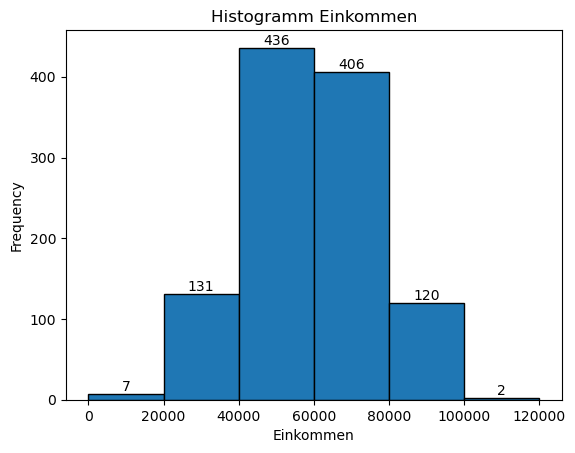

1003 der 1004 Angaben zum Einkommen bewegen sich zwischen 14547 € und 107689€ und sind realistisch
Einer liegt bei 1000000000. Diesen stufen wir als Ausreißer ein.
Er kann eine Fehlangaben, ein Datenverarbeitungsfehler oder ein extremer Einzelfall sein.


In [305]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]

plt.hist(customer_geo_retype['Einkommen'], bins=bins, edgecolor='black')

plt.xlabel('Einkommen')
plt.ylabel('Frequency')
plt.title('Histogramm Einkommen')
for i in range(len(bins)-1):
    count = ((customer_geo_retype['Einkommen'] >= bins[i]) & (customer_geo_retype['Einkommen'] < bins[i+1])).sum()
    plt.text((bins[i] + bins[i+1]) / 2, count, str(count), ha='center', va='bottom')

plt.show()

print("1003 der 1004 Angaben zum Einkommen bewegen sich zwischen 14547 € und 107689€ und sind realistisch")
print("Einer liegt bei 1000000000. Diesen stufen wir als Ausreißer ein.")
print("Er kann eine Fehlangaben, ein Datenverarbeitungsfehler oder ein extremer Einzelfall sein.")

In [306]:
valid_mean = customer_geo_retype[(customer_geo_retype['Einkommen'] >= 0) & (customer_geo_retype['Einkommen'] <= 500000)]['Einkommen'].mean()

# Ersetzen der Ausreißer durch den Durchschnitt
customer_geo_retype['Einkommen'] = customer_geo_retype['Einkommen'].apply(lambda x: valid_mean if x < 0 or x > 500000 else x)

# Drucken der ersetzen Zeilen (Ausreißer)
replaced_values = customer_geo_retype[(customer_geo_retype['Einkommen'] < 0) | (customer_geo_retype['Einkommen'] > 500000)]

# Ergebnis anzeigen
print("\nDataFrame nach der Ersetzung:")
print(customer_geo_retype.describe())



DataFrame nach der Ersetzung:
        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1104.000000  1104.000000    1104.000000    1104.000000  1104.000000
mean      0.638587    50.375000   58841.233212   88975.198714    44.375906
std       0.480628    11.951426   16603.953365   24464.067781    10.848040
min       0.000000    30.000000       0.000000   21471.650000    12.000000
25%       0.000000    40.000000   46662.750000   70609.422500    37.000000
50%       1.000000    51.000000   59011.500000   88931.455000    44.000000
75%       1.000000    61.000000   70281.750000  107093.375000    52.000000
max       1.000000    70.000000  107689.000000  165482.310000    80.000000


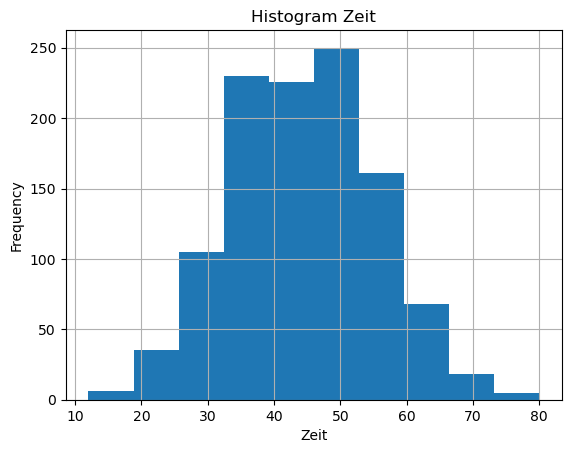

In [307]:
customer_geo_retype['Zeit'].hist()
plt.xlabel('Zeit')
plt.ylabel('Frequency')
plt.title('Histogram Zeit')
plt.show()

In [308]:
q1 = customer_geo_retype['Zeit'].quantile(0.25)
q3 = customer_geo_retype['Zeit'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

outliers = customer_geo_retype[(customer_geo_retype['Zeit'] < lower_bound) | (customer_geo_retype['Zeit'] > upper_bound)]
print("Ausreißer:")
print(outliers)

non_outliers_mean = customer_geo_retype[(customer_geo_retype['Zeit'] >= lower_bound) & (customer_geo_retype['Zeit'] <= upper_bound)]['Zeit'].mean()
customer_geo_retype['Zeit'] = customer_geo_retype['Zeit'].apply(lambda x: non_outliers_mean if x < lower_bound or x > upper_bound else x)
print(customer_geo_retype.describe())

print("Wir setzen die Untergrenze in Sachen 'Zeit' auf 20. Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.")
print("Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,") 
print("dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und")
print("länger überlegende Kunden im Geschäft zu haben.")
print("Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.")

Untergrenze: 14.5
Obergrenze: 74.5
Ausreißer:
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
248    K0249           0   62.0    96569.0  140745.65    80   
383    K0384           1   38.0    33666.0   50494.07    13   
394    K0395           1   34.0    24811.0   57541.73    12   
896    K0897           1   64.0    91409.0  140161.07    76   
982    K0983           1   33.0    38675.0   56493.40    13   
1092   K1093           1   67.0    89170.0  123408.48    76   

            Niederlassung  
248                Bayern  
383   Nordrhein-Westfalen  
394               Hamburg  
896               Sachsen  
982     Baden-Württemberg  
1092              Hamburg  
        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1104.000000  1104.000000    1104.000000    1104.000000  1104.000000
mean      0.638587    50.375000   58841.233212   88975.198714    44.372495
std       0.480628    11.951426   16603.953365   24464.067781    10.582091
min       0.0000

In [309]:
# Visuelle & Statistische Ausreißerbereinigung von Customer

In [310]:
print(visitor_geo.describe())

       Geschlecht       Alter      Einkommen        Zeit
count  891.000000  891.000000     891.000000  891.000000
mean     0.578002   49.881033   59367.936188   35.166105
std      0.494156   11.865889   16164.358221   10.476802
min      0.000000   30.000000   10802.033307    3.000000
25%      0.000000   40.000000   47816.611417   28.000000
50%      1.000000   49.000000   59163.823681   35.000000
75%      1.000000   60.000000   71001.378839   43.000000
max      1.000000   70.000000  108569.087021   68.000000


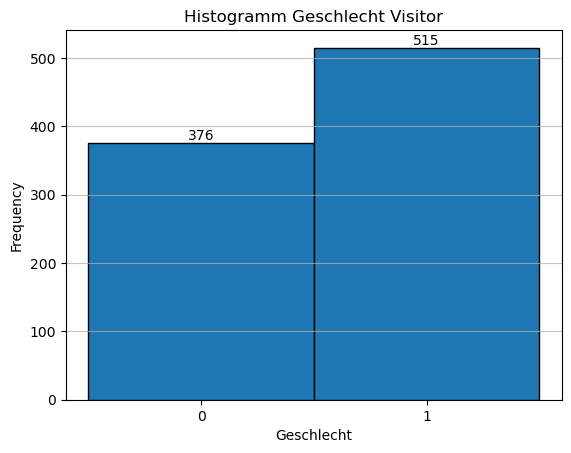

In [311]:
plt.hist(visitor_geo_retype['Geschlecht'], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Geschlecht')
plt.ylabel('Frequency')
plt.title('Histogramm Geschlecht Visitor')
for i in range(2):  # 0 und 1
    count = visitor_geo_retype['Geschlecht'].value_counts()[i]
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.grid(axis='y', alpha=0.75)
plt.show()

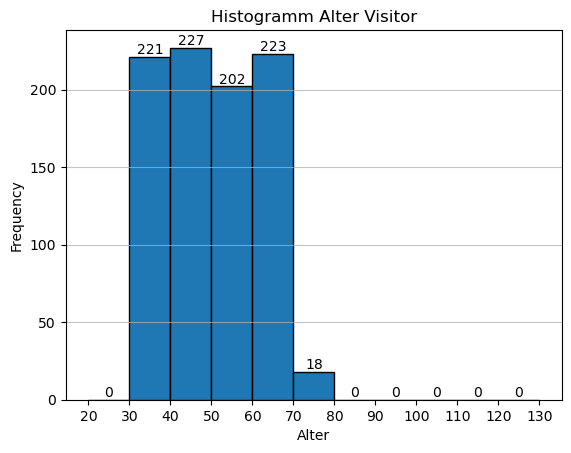

In [312]:
n, bins, patches = plt.hist(visitor_geo_retype['Alter'], bins=range(20, 140, 10), edgecolor='black')  
plt.xticks(range(20, 140, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Visitor')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

In [313]:
print("Keine Ausreißer")

Keine Ausreißer


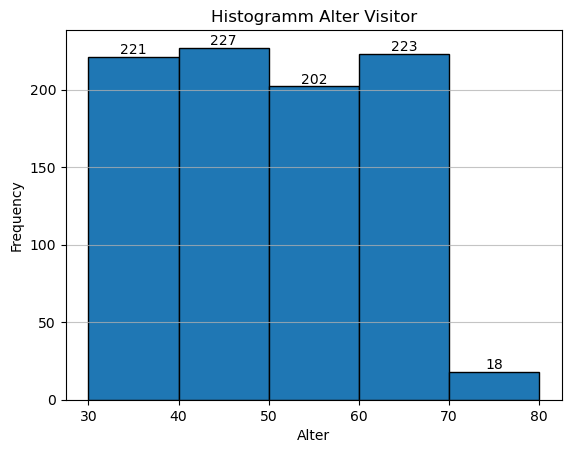

In [314]:
n, bins, patches = plt.hist(visitor_geo_retype['Alter'], bins=range(30, 90, 10), edgecolor='black')  
plt.xticks(range(30, 90, 10))
plt.xlabel('Alter')
plt.ylabel('Frequency')
plt.title('Histogramm Alter Visitor')
for i in range(len(patches)):
    height = patches[i].get_height()
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, height, int(height), ha='center', va='bottom')

plt.grid(axis='y', alpha=0.75)
plt.show()

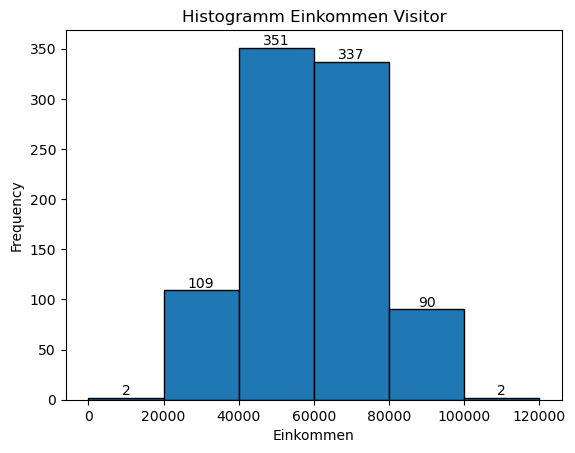

In [315]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]

plt.hist(visitor_geo_retype['Einkommen'], bins=bins, edgecolor='black')

plt.xlabel('Einkommen')
plt.ylabel('Frequency')
plt.title('Histogramm Einkommen Visitor')
for i in range(len(bins)-1):
    count = ((visitor_geo_retype['Einkommen'] >= bins[i]) & (visitor_geo_retype['Einkommen'] < bins[i+1])).sum()
    plt.text((bins[i] + bins[i+1]) / 2, count, str(count), ha='center', va='bottom')

plt.show()

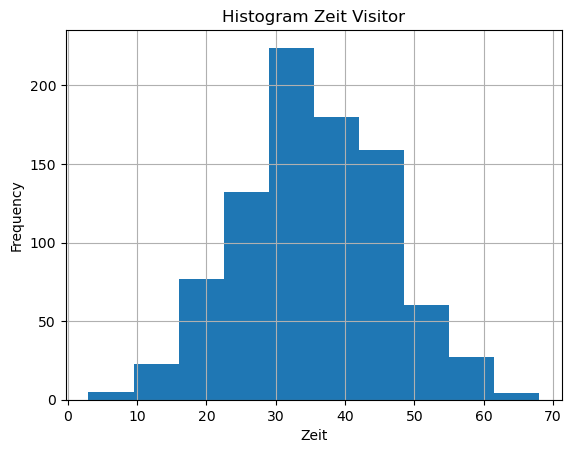

In [316]:
visitor_geo_retype['Zeit'].hist()
plt.xlabel('Zeit')
plt.ylabel('Frequency')
plt.title('Histogram Zeit Visitor')
plt.show()

In [317]:
q1 = visitor_geo_retype['Zeit'].quantile(0.25)
q3 = visitor_geo_retype['Zeit'].quantile(0.75)
iqr = q3 - q1

# Bestimmen der unteren und oberen Grenzen für Ausreißer
lower_bound = 10
upper_bound = 90

print(f"Untergrenze: {lower_bound}")
print(f"Obergrenze: {upper_bound}")

outliers = visitor_geo_retype[(visitor_geo_retype['Zeit'] < lower_bound) | (visitor_geo_retype['Zeit'] > upper_bound)]
print("Ausreißer:")
print(outliers)

non_outliers_mean = visitor_geo_retype[(visitor_geo_retype['Zeit'] >= lower_bound) & (visitor_geo_retype['Zeit'] <= upper_bound)]['Zeit'].mean()

visitor_geo_retype['Zeit'] = visitor_geo_retype['Zeit'].apply(lambda x: non_outliers_mean if x < lower_bound or x > upper_bound else x)

print(visitor_geo_retype.describe())

Untergrenze: 10
Obergrenze: 90
Ausreißer:
    KundeNr  Geschlecht  Alter  Einkommen  Zeit        Niederlassung
52    K1157           0     30   30096.84     8            Thüringen
91    K1196           1     43   37696.63     7        Niedersachsen
442   K1547           1     40   39581.25     5        Niedersachsen
518   K1623           1     31   38298.53     3  Nordrhein-Westfalen
864   K1969           1     51   70533.44     7    Baden-Württemberg
       Geschlecht       Alter      Einkommen        Zeit
count  891.000000  891.000000     891.000000  891.000000
mean     0.578002   49.881033   59367.936049   35.330700
std      0.494156   11.865889   16164.358263   10.243995
min      0.000000   30.000000   10802.030000   10.000000
25%      0.000000   40.000000   47816.610000   28.000000
50%      1.000000   49.000000   59163.820000   35.000000
75%      1.000000   60.000000   71001.380000   43.000000
max      1.000000   70.000000  108569.090000   68.000000


In [318]:
print("Wir setzen die Untergrenze in Sachen 'Zeit' auf 10 Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.")
print("Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,") 
print("dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und")
print("länger überlegende Kunden im Geschäft zu haben.")
print("Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.")

Wir setzen die Untergrenze in Sachen 'Zeit' auf 10 Wir glauben, dass diese niedrig aber für Einzelfälle Realistisch ist.
Die Obergrenze Setzen wir mit 90 hoch. Wir begründen dies damit,
dass es nicht umbedingt ungweöhnlich ist bei einem Autokauf genau nachfragende und
länger überlegende Kunden im Geschäft zu haben.
Wir setzen die Obergrenze in erster linie um Messfehler in extremer höhe heraus zu filtern.


In [319]:
print(customer_geo_retype.describe())
print(customer_geo_retype)
print(
)
print(visitor_geo_retype.describe())
print(visitor_geo_retype)

        Geschlecht        Alter      Einkommen          Preis         Zeit
count  1104.000000  1104.000000    1104.000000    1104.000000  1104.000000
mean      0.638587    50.375000   58841.233212   88975.198714    44.372495
std       0.480628    11.951426   16603.953365   24464.067781    10.582091
min       0.000000    30.000000       0.000000   21471.650000    15.000000
25%       0.000000    40.000000   46662.750000   70609.422500    37.000000
50%       1.000000    51.000000   59011.500000   88931.455000    44.000000
75%       1.000000    61.000000   70281.750000  107093.375000    52.000000
max       1.000000    70.000000  107689.000000  165482.310000    74.000000
     KundeNr  Geschlecht  Alter  Einkommen      Preis  Zeit  \
0      K0001           1   68.0    89437.0  114481.90  62.0   
1      K0002           1   58.0    65271.0  106258.99  44.0   
2      K0003           1   44.0    48195.0   85705.57  29.0   
3      K0004           0   37.0    48957.0   76412.36  36.0   
4      K00

In [320]:
# KundeNr als Index setzen
customer_geo_retype.set_index('KundeNr', inplace=True)
visitor_geo_retype.set_index('KundeNr', inplace=True)

# Auswahl der gewünschten Spalten
customer_geo_retype = customer_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit', 'Preis']]
visitor_geo_retype = visitor_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit']]

# Zusammenführen der DataFrames
df = pd.concat([customer_geo_retype, visitor_geo_retype])

# Ausgabe des resultierenden DataFrames
print(df)

         Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
KundeNr                                                                    
K0001             1   68.0   89437.00              Sachsen  62.0  114481.90
K0002             1   58.0   65271.00  Nordrhein-Westfalen  44.0  106258.99
K0003             1   44.0   48195.00               Hessen  29.0   85705.57
K0004             0   37.0   48957.00               Bayern  36.0   76412.36
K0005             0   50.0   56621.00               Bayern  40.0   92898.67
...             ...    ...        ...                  ...   ...        ...
K1991             1   48.0   59967.31               Hessen  21.0        NaN
K1992             1   67.0   81521.76    Baden-Württemberg  21.0        NaN
K1993             0   40.0   41616.57  Nordrhein-Westfalen  48.0        NaN
K1994             1   49.0   76602.79               Berlin  19.0        NaN
K1995             1   49.0   54754.53               Berlin  44.0        NaN

[1995 rows 

In [321]:
all_customer_numbers = [f'K{str(i).zfill(4)}' for i in range(1, 1996)]

# Finden der fehlenden Kundennummern
missing_customer_numbers = set(all_customer_numbers) - set(df.index)

# Ausgabe der fehlenden Kundennummern
print("Fehlende Kundennummern:")
print(sorted(missing_customer_numbers))
all_customer_numbers = [f'K{str(i).zfill(4)}' for i in range(1, 1996)]

# Finden der fehlenden Kundennummern
missing_customer_numbers = sorted(set(all_customer_numbers) - set(df.index))

# Erstellen eines DataFrames mit den fehlenden Kundennummern
missing_df = pd.DataFrame(index=missing_customer_numbers, columns=df.columns)
missing_df.index.name = 'KundeNr'

# Ausgabe der fehlenden Kundennummern als fehlende Zeilen
print("Fehlende Zeilen:")
print(missing_df)

Fehlende Kundennummern:
[]
Fehlende Zeilen:
Empty DataFrame
Columns: [Geschlecht, Alter, Einkommen, Niederlassung, Zeit, Preis]
Index: []


In [322]:
print(customer_geo_retype)

# Erstellen eines neuen Indexes von K1006 bis K1896
new_index = [f'K{i:04d}' for i in range(1006, 1006 + len(visitor_geo_retype))]

# Setzen des neuen Indexes
visitor_geo_retype.index = new_index
print(visitor_geo_retype)

         Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
KundeNr                                                                    
K0001             1   68.0    89437.0              Sachsen  62.0  114481.90
K0002             1   58.0    65271.0  Nordrhein-Westfalen  44.0  106258.99
K0003             1   44.0    48195.0               Hessen  29.0   85705.57
K0004             0   37.0    48957.0               Bayern  36.0   76412.36
K0005             0   50.0    56621.0               Bayern  40.0   92898.67
...             ...    ...        ...                  ...   ...        ...
K1100             1   61.0    82624.0               Berlin  59.0  134755.80
K1101             1   39.0    37905.0               Hessen  32.0   61717.86
K1102             1   39.0    40159.0        Niedersachsen  37.0   67170.69
K1103             0   48.0    45545.0               Berlin  30.0   75700.83
K1104             1   63.0    80414.0              Sachsen  49.0  101554.64

[1104 rows 

In [333]:
# Auswahl der gewünschten Spalten
customer_geo_retype = customer_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit', 'Preis']]
visitor_geo_retype = visitor_geo_retype[['Geschlecht', 'Alter', 'Einkommen', 'Niederlassung', 'Zeit']]

# Zusammenführen der DataFrames
df = pd.concat([customer_geo_retype, visitor_geo_retype])

# Entfernen von Zeilen mit fehlenden Werten (optional, wenn notwendig)
df.dropna(how='all', inplace=True)

# Ausgabe des DataFrames mit dem neuen Index
print(df)

# Filtern der Zeilen von 'K1004' bis 'K1105'
filtered_df = df.loc['K1004':'K1105']

# Anzeigen der gefilterten Zeilen
print(filtered_df)

      Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
K0001   Männlich   68.0   89437.00              Sachsen  62.0  114481.90
K0002   Männlich   58.0   65271.00  Nordrhein-Westfalen  44.0  106258.99
K0003   Männlich   44.0   48195.00               Hessen  29.0   85705.57
K0004   Weiblich   37.0   48957.00               Bayern  36.0   76412.36
K0005   Weiblich   50.0   56621.00               Bayern  40.0   92898.67
...          ...    ...        ...                  ...   ...        ...
K1892   Männlich   48.0   59967.31               Hessen  21.0        NaN
K1893   Männlich   67.0   81521.76    Baden-Württemberg  21.0        NaN
K1894   Weiblich   40.0   41616.57  Nordrhein-Westfalen  48.0        NaN
K1895   Männlich   49.0   76602.79               Berlin  19.0        NaN
K1896   Männlich   49.0   54754.53               Berlin  44.0        NaN

[1995 rows x 6 columns]
      Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
K1004   Männlich   42.0   

In [334]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, K0001 to K1896
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geschlecht     1995 non-null   object 
 1   Alter          1995 non-null   float64
 2   Einkommen      1995 non-null   float64
 3   Niederlassung  1995 non-null   object 
 4   Zeit           1995 non-null   float64
 5   Preis          1104 non-null   float64
dtypes: float64(4), object(2)
memory usage: 173.6+ KB
None


In [335]:
# Ensure that the 'Geschlecht', 'Alter', and 'Zeit' columns are of integer type
df = df.astype({'Geschlecht': int, 'Alter': int, 'Zeit': int})

# Replace 1 with 'Männlich' and 0 with 'Weiblich' in the 'Geschlecht' column
df['Geschlecht'] = df['Geschlecht'].replace({1: 'Männlich', 0: 'Weiblich'})

# Display the updated dataframe
print(df)
print(
    )
print(df.dtypes)

ValueError: invalid literal for int() with base 10: 'Männlich'

In [336]:
customer_geo_retype['Geschlecht'] = customer_geo_retype['Geschlecht'].replace({1: 'Männlich', 0: 'Weiblich'})
visitor_geo_retype['Geschlecht'] = visitor_geo_retype['Geschlecht'].replace({1: 'Männlich', 0: 'Weiblich'})
Kunden = customer_geo_retype
Besucher = visitor_geo_retype
print("Final Tabelle Kundendaten")
print(Kunden)
print(Kunden.describe())
print(
)
print("Finale Tabelle Besucherdaten")
print(Besucher)
print(Besucher.describe())

Final Tabelle Kundendaten
        Geschlecht  Alter  Einkommen        Niederlassung  Zeit      Preis
KundeNr                                                                   
K0001     Männlich   68.0    89437.0              Sachsen  62.0  114481.90
K0002     Männlich   58.0    65271.0  Nordrhein-Westfalen  44.0  106258.99
K0003     Männlich   44.0    48195.0               Hessen  29.0   85705.57
K0004     Weiblich   37.0    48957.0               Bayern  36.0   76412.36
K0005     Weiblich   50.0    56621.0               Bayern  40.0   92898.67
...            ...    ...        ...                  ...   ...        ...
K1100     Männlich   61.0    82624.0               Berlin  59.0  134755.80
K1101     Männlich   39.0    37905.0               Hessen  32.0   61717.86
K1102     Männlich   39.0    40159.0        Niedersachsen  37.0   67170.69
K1103     Weiblich   48.0    45545.0               Berlin  30.0   75700.83
K1104     Männlich   63.0    80414.0              Sachsen  49.0  101554.64

In [337]:
# Aufgabe 1: Wie viele Autos wurden verkauft?

In [338]:
verkaufte_Autos = df[df['Preis'].notna()]
Anzahl_verkaufter_Autos = len(verkaufte_Autos)

print(f"Es wurden {Anzahl_verkaufter_Autos} Autos verkauft.")

Es wurden 1104 Autos verkauft.


In [339]:
# Aufgabe 2: Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [340]:
# Min, Max und Mean der Spalte 'Preis'
preis_min = df['Preis'].min()
preis_max = df['Preis'].max()
preis_mean = df['Preis'].mean().round(2)

# Ausgabe der Ergebnisse
print(f"Der Mindestpreis ist:          {preis_min:,}€")
print(f"Der Maximalpreis ist:         {preis_max:,}€")
print(f"Der Durchschnittspreis ist:    {preis_mean:,}€")

AttributeError: 'float' object has no attribute 'round'

In [341]:
# Aufgabe 3: Wie hoch war der Gesamtumsatz?

In [342]:
Gesamtumsatz = df['Preis'].sum()
print(f"Der Gesamtumsatz liegt bei: {Gesamtumsatz:,}€")

Der Gesamtumsatz liegt bei: 98,228,619.38€


In [343]:
# Aufgabe 4: Wie viele Autos wurden pro Bundesland verkauft?

In [344]:
# Aufgabe 5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [345]:
# Aufgabe 6: In welchem Bundesland wurde das teuerste Auto verkauft?

In [346]:
# Aufgabe 7: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

In [347]:
# Aufgabe 8: Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?

In [348]:
# Aufgabe 9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [349]:
# Aufgabe 10: Bestimmen Sie, ob es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden 
#             und dem Durchschnittseinkommen der Besucher gibt.

In [350]:
from scipy.stats import ttest_ind

# Beispielgruppen aus den beiden DataFrames
einkommen_der_kunden = customer_geo_retype['Einkommen']
einkommen_der_besucher = visitor_geo_retype['Einkommen']

# Welch-T-Test
t_stat, p_value = ttest_ind(einkommen_der_kunden, einkommen_der_besucher, equal_var=False)

print(f"Welch's T-Statistik: {t_stat}")
print(f"P-Wert: {p_value}")

Welch's T-Statistik: -0.7147880334114172
P-Wert: 0.4748267082926213


In [351]:
# Aufgabe 11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?

In [352]:
correlation_matrix = df[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')

# Ausgabe der Korrelationsmatrix
print("Korrelationsmatrix (Pearson-Korrelation):")
print(correlation_matrix)
correlation_list = correlation_matrix.values.flatten().tolist()
correlation_list = [round(coeff, 2) for coeff in correlation_list]
print(
)
print("Hinweis: Die Funktion .corr('method='pearson') ignoriert alle Wertepaare bei denen ein Wert NaN ist.")
print(
)
alter_einkommen = "positive Korrelation. Ältere Personen tendieren dazu, höhere Einkommen zu haben."
alter_preis = "starke positive Korrelation. Ältere Personen neigen dazu, höhere Preise zu zahlen."
alter_zeit = "schwache positive Korrelation. Ältere Personen bleiben tendenziell etwas länger im Geschäft."
einkommen_preis = "sehr starke positive Korrelation. Personen mit höherem Einkommen tendieren dazu, höhere Preise zu zahlen."
einkommen_zeit = "moderate positive Korrelation. Personen mit höherem Einkommen bleiben tendenziell länger im Geschäft."
preis_zeit = "moderate positive Korrelation. Höhere Preise korrelieren mit einer tendenziell höheren Vorgangszeit."

KE_AE = correlation_list[1]
KE_AP = correlation_list[2]
KE_AZ = correlation_list[3]
KE_EP = correlation_list[6]
KE_EZ = correlation_list[7]
KE_PZ = correlation_list[11]
print("Interpretation der jeweiligen Korrelationskoefizienten")
print(
)
print("Alter - Einkommen korreliert mit:", KE_AE)
print(alter_einkommen)
print(
)
print("Alter - Preis korreliert mit", KE_AP)
print(alter_preis)
print(
)
print("Alter - Zeit korreliert mit", KE_AZ)
print(alter_zeit)
print(
)
print("Einkommen - Preis korreliert mit", KE_EP)
print(einkommen_preis)
print(
)
print("Einkommen - Preis korreliert mit", KE_EZ)
print(einkommen_zeit)
print(
)
print("Preis - Zeit korreliert mit", KE_PZ)
print(preis_zeit)

Korrelationsmatrix (Pearson-Korrelation):
              Alter  Einkommen     Preis      Zeit
Alter      1.000000   0.783247  0.780478  0.305809
Einkommen  0.783247   1.000000  0.886670  0.383255
Preis      0.780478   0.886670  1.000000  0.698263
Zeit       0.305809   0.383255  0.698263  1.000000

Hinweis: Die Funktion .corr('method='pearson') ignoriert alle Wertepaare bei denen ein Wert NaN ist.

Interpretation der jeweiligen Korrelationskoefizienten

Alter - Einkommen korreliert mit: 0.78
positive Korrelation. Ältere Personen tendieren dazu, höhere Einkommen zu haben.

Alter - Preis korreliert mit 0.78
starke positive Korrelation. Ältere Personen neigen dazu, höhere Preise zu zahlen.

Alter - Zeit korreliert mit 0.31
schwache positive Korrelation. Ältere Personen bleiben tendenziell etwas länger im Geschäft.

Einkommen - Preis korreliert mit 0.89
sehr starke positive Korrelation. Personen mit höherem Einkommen tendieren dazu, höhere Preise zu zahlen.

Einkommen - Preis korreliert mit 

In [353]:
# Aufgabe 12: Testen Sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalverteilt ist.

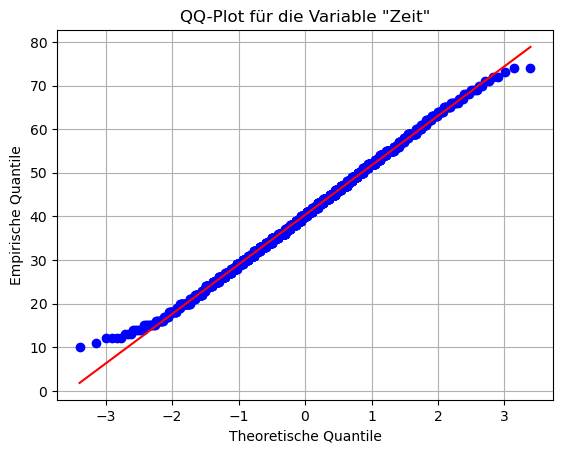

In [354]:
# QQ-Plot für die Variable "Zeit"
zeit = df['Zeit'].dropna()

# QQ-Plot erstellen
stats.probplot(zeit, dist="norm", plot=plt)
plt.title('QQ-Plot für die Variable "Zeit"')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Empirische Quantile')
plt.grid(True)

In [355]:
# Aufgabe 13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen?
#             Kundenabteilung hat vergessen, diese Informationen zu erfassen. Wir können davon aus
#             gehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit
#             aufgenommen haben.

In [356]:
# Aufgabe 14: Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? Wählen Sie die geeigneten
#             unabhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.

In [357]:
# Aufgabe 15: Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im
#             Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis
#             preis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit
#             einem Einkommen von 54.000 Euro.

In [358]:

Kunden = customer_geo_retype

# Filtere für männliche Kunden
male_customers = Kunden[Kunden['Geschlecht'] == 'Männlich']

# Bereite die Daten für die Regression vor
X = male_customers[['Alter', 'Einkommen']]
y = male_customers['Preis']

# Fitte ein lineares Regressionsmodell
model = LinearRegression()
model.fit(X, y)

# Vorhersagen für die angegebenen Kunden
input_32_30000 = pd.DataFrame({'Alter': [32], 'Einkommen': [30000]})
input_51_54000 = pd.DataFrame({'Alter': [51], 'Einkommen': [54000]})

predicted_price_32_30000 = model.predict(input_32_30000)
predicted_price_51_54000 = model.predict(input_51_54000)

# Vorhersagen runden und anzeigen
print("Prognostizierter Kaufpreis für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro: ", round(predicted_price_32_30000[0], 2))
print("Prognostizierter Kaufpreis für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro: ", round(predicted_price_51_54000[0], 2))


Prognostizierter Kaufpreis für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro:  51311.63
Prognostizierter Kaufpreis für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro:  85502.52


In [365]:

Kunden = customer_geo_retype

# Replace 1 with 'Männlich' and 0 mit 'Weiblich'
customer_geo_retype['Geschlecht'] = customer_geo_retype['Geschlecht'].replace({1: 'Männlich', 0: 'Weiblich'})

# Filtere für männliche Kunden
male_customers = Kunden[Kunden['Geschlecht'] == 'Männlich']

# Bereite die Daten für die Regression vor
X = male_customers[['Alter', 'Einkommen']]
y = male_customers['Preis']

# Fitte ein lineares Regressionsmodell
model = LinearRegression()
model.fit(X, y)

# Vorhersagen für die angegebenen Kunden
input_32_30000 = pd.DataFrame({'Alter': [32], 'Einkommen': [30000]})
input_51_54000 = pd.DataFrame({'Alter': [51], 'Einkommen': [54000]})

predicted_price_32_30000 = model.predict(input_32_30000)
predicted_price_51_54000 = model.predict(input_51_54000)

# Vorhersagen runden und anzeigen
print("Prognostizierter Kaufpreis für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro: ", round(predicted_price_32_30000[0], 2))
print("Prognostizierter Kaufpreis für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro: ", round(predicted_price_51_54000[0], 2))


Prognostizierter Kaufpreis für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro:  19504.54
Prognostizierter Kaufpreis für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro:  32083.92


In [364]:
# Aufgabe 16: In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am
#             meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen
#             direkt vergleichbar sein. Wie sollen die Daten transformiert werden?

In [366]:


# Angenommen, customer_geo_retype ist bereits als DataFrame geladen
Kunden = customer_geo_retype

# Filtere für männliche Kunden
male_customers = Kunden[Kunden['Geschlecht'] == 'Männlich']

# Normalisiere die Daten für die Regressionsanalyse
scaler = StandardScaler()
Kunden[['Alter', 'Einkommen']] = scaler.fit_transform(Kunden[['Alter', 'Einkommen']])

# Passe ein lineares Regressionsmodell an die normalisierten Daten an
X = Kunden[['Alter', 'Einkommen']]
y = Kunden['Preis']
model_normalized = LinearRegression()
model_normalized.fit(X, y)

# Erhalte die Regressionskoeffizienten
coefficients = model_normalized.coef_

# Bestimme den Einfluss jeder Variable
influence = pd.Series(coefficients, index=['Alter', 'Einkommen'])

# Runde die Einflusswerte auf zwei Nachkommastellen
influence = influence.round(2)

print("Einfluss der Variablen auf den Preis des Autos:")
print(influence)

# Aufgabe 15: Vorhersage des Kaufpreises für spezifische Kunden
# Hinweis: Verwende den ursprünglichen Maßstab für die Vorhersageeingaben
input_32_30000 = pd.DataFrame({'Alter': [32], 'Einkommen': [30000]})
input_51_54000 = pd.DataFrame({'Alter': [51], 'Einkommen': [54000]})

# Skaliere die Eingaben mit dem gleichen Skalierer
input_32_30000_scaled = scaler.transform(input_32_30000)
input_51_54000_scaled = scaler.transform(input_51_54000)

# Stelle sicher, dass die Daten gültige Feature-Namen für die Vorhersage haben
input_32_30000_df = pd.DataFrame(input_32_30000_scaled, columns=['Alter', 'Einkommen'])
input_51_54000_df = pd.DataFrame(input_51_54000_scaled, columns=['Alter', 'Einkommen'])

# Mache die Vorhersagen
predicted_price_32_30000 = model_normalized.predict(input_32_30000_df)
predicted_price_51_54000 = model_normalized.predict(input_51_54000_df)

# Runde die Vorhersagen auf zwei Nachkommastellen
predicted_price_32_30000 = round(predicted_price_32_30000[0], 2)
predicted_price_51_54000 = round(predicted_price_51_54000[0], 2)

# Zeige die Vorhersagen an
print("Prognostizierter Kaufpreis für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro: ", predicted_price_32_30000)
print("Prognostizierter Kaufpreis für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro: ", predicted_price_51_54000)

# Berechne das Durchschnittsalter und -einkommen der Kunden im ursprünglichen Maßstab
mean_age = scaler.inverse_transform([[Kunden['Alter'].mean(), 0]])[0][0]
mean_income = scaler.inverse_transform([[0, Kunden['Einkommen'].mean()]])[0][1]

# Runde die Durchschnittswerte auf zwei Nachkommastellen
mean_age = round(mean_age, 2)
mean_income = round(mean_income, 2)

# Zeige die Durchschnittswerte im ursprünglichen Maßstab an
print("Durchschnittsalter der Kunden: ", mean_age)
print("Durchschnittliches Einkommen der Kunden: ", mean_income)



Einfluss der Variablen auf den Preis des Autos:
Alter        1092.49
Einkommen    2320.92
dtype: float64
Prognostizierter Kaufpreis für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro:  16074.96
Prognostizierter Kaufpreis für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro:  28256.62
Durchschnittsalter der Kunden:  29.5
Durchschnittliches Einkommen der Kunden:  61500.0


In [ ]:
#Interpretation der Regressionskoeffizienten:

#Einfluss von Alter:
#Dies bedeutet, dass für jedes zusätzliche Jahr im Alter des Kunden der vorhergesagte Preis des Autos um etwa Betrag-Alter
#Euro steigt, wenn alle anderen Variablen (wie Einkommen) konstant gehalten werden.
#Beispiel: Wenn der Preis eines Autos für einen 31-jährigen Kunden bei 10.000 Euro liegt, dann würde der Preis für einen
#32-jährigen Kunden (bei gleichem Einkommen) um etwa 1092.49 Euro höher liegen, also bei etwa 11.092,49 Euro.

#Einfluss von Einkommen:
#Dies bedeutet, dass für jede zusätzliche Einheit des Einkommens (in der gleichen Einheit wie die Daten, z.B. Euro) der
#vorhergesagte Preis des Autos um Betrag-Einkommen Euro steigt, wenn alle anderen Variablen (wie Alter) konstant gehalten werden.
#Beispiel: Wenn der Preis eines Autos für einen Kunden mit einem Einkommen von 50.000 Euro bei 20.000 Euro liegt, dann würde 
#der Preis für einen Kunden mit einem Einkommen von 51.000 Euro (bei gleichem Alter) um etwa 2320.92 Euro höher liegen, 
#also bei etwa 22.320,92 Euro.

#Zusammenfassung:
#Alter: Ein Anstieg um ein Jahr im Alter des Kunden führt zu einem Anstieg des Autopreises um etwa Betrag-Alter Euro, 
#unabhängig vom Einkommen des Kunden.
#Einkommen: Ein Anstieg des Einkommens um eine Einheit (1 Euro) führt zu einem Anstieg des Autopreises um Betrag-Einkommen Euro,
#unabhängig vom Alter des Kunden.


In [ ]:
# Aufgabe 17: Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt.
#             Verwenden Sie die entsprechende Methode.

In [ ]:


# Angenommen, customer_geo_retype ist bereits als DataFrame geladen
Kunden = customer_geo_retype

# 2. Binäre Zielvariable erstellen
Kunden['Purchase'] = (Kunden['Preis'] > 25000).astype(int)

# 3. Features und Zielvariable für logistische Regression
X_log = Kunden[['Alter', 'Einkommen', 'Zeit']]
y_log = Kunden['Purchase']

# 4. Normalisierung der Features
scaler = StandardScaler()
X_log_normalized = scaler.fit_transform(X_log)

# 5. Logistisches Regressionsmodell fitten
log_model = LogisticRegression()
log_model.fit(X_log_normalized, y_log)

# 6. Regressionskoeffizienten anzeigen
log_coefficients = pd.Series(log_model.coef_[0], index=['Alter', 'Einkommen', 'Zeit'])
print("Regressionskoeffizienten des logistischen Modells:")
print(log_coefficients)

# 7. Funktion zur Berechnung der Kaufwahrscheinlichkeit
def predict_purchase_probability(age, income, time):
    input_data = pd.DataFrame({'Alter': [age], 'Einkommen': [income], 'Zeit': [time]})
    input_data_normalized = scaler.transform(input_data)
    probability = log_model.predict_proba(input_data_normalized)[0][1]
    return probability

# 8. Beispielhafte Vorhersagen
probability_32_30000_30min = predict_purchase_probability(32, 30000, 30)
probability_51_54000_45min = predict_purchase_probability(51, 54000, 45)

# 9. Vorhersagen anzeigen
print("Wahrscheinlichkeit des Kaufs für einen 32-jährigen Kunden mit einem Einkommen von 30.000 Euro und 30 Minuten Testzeit: ", probability_32_30000_30min)
print("Wahrscheinlichkeit des Kaufs für einen 51-jährigen Kunden mit einem Einkommen von 54.000 Euro und 45 Minuten Testzeit: ", probability_51_54000_45min)


In [ ]:
#Interpretation der Regressionskoeffizienten:
#Alter: 0.225955
#Dies bedeutet, dass für jedes zusätzliche Jahr im Alter des Kunden die Log-Odds für den Kauf des Autos um 0.225955 steigen,
#wenn alle anderen Variablen konstant gehalten werden.

#Einkommen: 1.050387
#Dies bedeutet, dass für jede zusätzliche Einheit des Einkommens (standardisiert) die Log-Odds für den Kauf des Autos
#um 1.050387 steigen, wenn alle anderen Variablen konstant gehalten werden.

#Zeit: 0.709027
#Dies bedeutet, dass für jede zusätzliche Minute der Testzeit die Log-Odds für den Kauf des Autos um 0.709027 steigen,
#wenn alle anderen Variablen konstant gehalten werden.

In [ ]:
# Aufgabe 18: Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem
#             Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer
#             Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde
#             mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines
#             unserer Modelle kauft?

In [ ]:


# Angenommen, customer_geo_retype ist bereits als DataFrame geladen
Kunden = customer_geo_retype

# Filtere für männliche Kunden
male_customers = Kunden[Kunden['Geschlecht'] == 'Männlich'].copy()

# Erstelle eine binäre Zielvariable für die logistische Regression
male_customers.loc[:, 'Purchase'] = (male_customers['Preis'] > 25000).astype(int)

# Features und Zielvariable für die logistische Regression
X_log = male_customers[['Alter', 'Einkommen', 'Zeit']]
y_log = male_customers['Purchase']

# Normalisiere die Features
scaler = StandardScaler()
X_log_normalized = scaler.fit_transform(X_log)

# Fitte ein logistisches Regressionsmodell
log_model = LogisticRegression()
log_model.fit(X_log_normalized, y_log)

# Funktion zur Berechnung der Kaufwahrscheinlichkeit für gegebenes Alter, Einkommen und Testzeit
def predict_purchase_probability(age, income, time):
    input_data = pd.DataFrame({'Alter': [age], 'Einkommen': [income], 'Zeit': [time]})
    input_data_normalized = scaler.transform(input_data)
    probability = log_model.predict_proba(input_data_normalized)[0][1]
    return probability

# Berechnung der Wahrscheinlichkeit für einen 32-jährigen Kunden mit einem Einkommen von 30.000 Euro und 30 Minuten Testzeit
probability_32_30000_30min = predict_purchase_probability(32, 30000, 30)

# Berechnung der Wahrscheinlichkeit für einen 51-jährigen Kunden mit einem Einkommen von 54.000 Euro und 45 Minuten Testzeit
probability_51_54000_45min = predict_purchase_probability(51, 54000, 45)

# Anzeige der Wahrscheinlichkeiten
print("Wahrscheinlichkeit des Kaufs für einen 32-jährigen männlichen Kunden mit einem Einkommen von 30.000 Euro und 30 Minuten Testzeit: ", round(probability_32_30000_30min, 4))
print("Wahrscheinlichkeit des Kaufs für einen 51-jährigen männlichen Kunden mit einem Einkommen von 54.000 Euro und 45 Minuten Testzeit: ", round(probability_51_54000_45min, 4))


In [ ]:
# Kaufwahrscheinlichkeit bei 30Min Testzeit

In [ ]:


# Angenommen, customer_geo_retype ist bereits als DataFrame geladen
Kunden = customer_geo_retype

# Erstelle eine binäre Zielvariable für die logistische Regression
Kunden['Purchase'] = (Kunden['Preis'] > 25000).astype(int)

# Features und Zielvariable für die logistische Regression
X_log = Kunden[['Alter', 'Einkommen', 'Zeit']]
y_log = Kunden['Purchase']

# Normalisiere die Features
scaler = StandardScaler()
X_log_normalized = scaler.fit_transform(X_log)

# Fitte ein logistisches Regressionsmodell
log_model = LogisticRegression()
log_model.fit(X_log_normalized, y_log)

# Funktion zur Berechnung der Kaufwahrscheinlichkeit für gegebenes Alter, Einkommen und Testzeit
def predict_purchase_probability(age, income, time):
    input_data = pd.DataFrame({'Alter': [age], 'Einkommen': [income], 'Zeit': [time]})
    input_data_normalized = scaler.transform(input_data)
    probability = log_model.predict_proba(input_data_normalized)[0][1]
    return probability

# Erstelle ein Gitter von Alters-, Einkommens- und Zeitwerten
age_range = np.arange(18, 101, 5)
income_range = np.arange(0, 110001, 10000)
time_range = np.arange(0, 61, 10)  # 0 bis 60 Minuten in 10-Minuten-Intervallen

# Berechne die Kaufwahrscheinlichkeit für jede Kombination aus Alter und Einkommen (bei 30 Minuten Testzeit)
probability_grid = np.zeros((len(age_range), len(income_range)))

for i, age in enumerate(age_range):
    for j, income in enumerate(income_range):
        probability_grid[i, j] = predict_purchase_probability(age, income, 30)  # 30 Minuten Testzeit

# Erstelle eine Heatmap der Kaufwahrscheinlichkeiten
plt.figure(figsize=(12, 8))
sns.heatmap(probability_grid, xticklabels=income_range, yticklabels=age_range, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap der Kaufwahrscheinlichkeiten (bei 30 Minuten Testzeit)')
plt.xlabel('Einkommen')
plt.ylabel('Alter')
plt.show()

# Erstelle einen 3D-Oberflächenplot der Kaufwahrscheinlichkeiten
age_grid, income_grid = np.meshgrid(age_range, income_range)
probability_grid_3d = np.zeros((len(income_range), len(age_range)), dtype=float)

for i in range(len(income_range)):
    for j in range(len(age_range)):
        probability_grid_3d[i, j] = predict_purchase_probability(age_range[j], income_range[i], 30)  # 30 Minuten Testzeit

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(age_grid, income_grid, probability_grid_3d, cmap='YlGnBu')

ax.set_title('3D-Oberflächenplot der Kaufwahrscheinlichkeiten (bei 30 Minuten Testzeit)')
ax.set_xlabel('Alter')
ax.set_ylabel('Einkommen')
ax.set_zlabel('Wahrscheinlichkeit des Kaufs')
plt.show()


In [ ]:
# Kaufwahrscheinlichkeit bei 45Min Testzeit

In [ ]:


# Angenommen, customer_geo_retype ist bereits als DataFrame geladen
Kunden = customer_geo_retype

# Erstelle eine binäre Zielvariable für die logistische Regression
male_customers.loc[:, 'Purchase'] = (male_customers['Preis'] > 25000).astype(int)

# Features und Zielvariable für die logistische Regression
X_log = male_customers[['Alter', 'Einkommen', 'Zeit']]
y_log = male_customers['Purchase']

# Normalisiere die Features
scaler = StandardScaler()
X_log_normalized = scaler.fit_transform(X_log)

# Fitte ein logistisches Regressionsmodell
log_model = LogisticRegression()
log_model.fit(X_log_normalized, y_log)

# Funktion zur Berechnung der Kaufwahrscheinlichkeit für gegebenes Alter, Einkommen und Testzeit
def predict_purchase_probability(age, income, time):
    input_data = pd.DataFrame({'Alter': [age], 'Einkommen': [income], 'Zeit': [time]})
    input_data_normalized = scaler.transform(input_data)
    probability = log_model.predict_proba(input_data_normalized)[0][1]
    return probability

# Erstelle ein Gitter von Alters- und Einkommenswerten
age_range = np.arange(18, 101, 5)
income_range = np.arange(0, 110001, 10000)

# Berechne die Kaufwahrscheinlichkeit für jede Kombination aus Alter und Einkommen (bei 45 Minuten Testzeit)
probability_grid = np.zeros((len(age_range), len(income_range)))

for i, age in enumerate(age_range):
    for j, income in enumerate(income_range):
        probability_grid[i, j] = predict_purchase_probability(age, income, 45)  # 45 Minuten Testzeit

# Erstelle eine Heatmap der Kaufwahrscheinlichkeiten
plt.figure(figsize=(12, 8))
sns.heatmap(probability_grid, xticklabels=income_range, yticklabels=age_range, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Heatmap der Kaufwahrscheinlichkeiten (bei 45 Minuten Testzeit)')
plt.xlabel('Einkommen')
plt.ylabel('Alter')
plt.show()

# Erstelle einen 3D-Oberflächenplot der Kaufwahrscheinlichkeiten
age_grid, income_grid = np.meshgrid(age_range, income_range)
probability_grid_3d = np.zeros((len(income_range), len(age_range)), dtype=float)

for i in range(len(income_range)):
    for j in range(len(age_range)):
        probability_grid_3d[i, j] = predict_purchase_probability(age_range[j], income_range[i], 45)  # 45 Minuten Testzeit

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(age_grid, income_grid, probability_grid_3d, cmap='YlGnBu')

ax.set_title('3D-Oberflächenplot der Kaufwahrscheinlichkeiten (bei 45 Minuten Testzeit)')
ax.set_xlabel('Alter')
ax.set_ylabel('Einkommen')
ax.set_zlabel('Wahrscheinlichkeit des Kaufs')
plt.show()


In [ ]:
# Aufgabe 19: Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen
#             len Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen der Daten
#             durchgeführt haben.

In [ ]:
# Aufgabe 20: Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen?
#             Welche zusätzlichen Informationen sollten gesammelt werden? 
#             Formulieren Sie zwei Vorschläge.